In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
import yfinance as yf

# Define the stock symbol and the date range
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download historical data
data = yf.download(symbol, start=start_date, end=end_date)

# Display the data
print(data)


In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data = data.reset_index()
data.head()

In [ ]:
data = data.drop(['Date','Adj Close'], axis = 1)

In [ ]:
data.head()

In [ ]:
plt.plot(data.Close)

In [ ]:
ma100 = data.Close.rolling(100).mean()
ma100

In [ ]:
ma100[100]

In [ ]:
ma100[98]

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100,'g')

In [ ]:
ma200 = data.Close.rolling(200).mean()
ma200

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')

In [ ]:
data.shape

In [ ]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.7)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.7):int(len(data))])

print(data_training.shape)
print(data_testing.shape)

In [ ]:
data_training.head()

In [ ]:
data_testing.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

In [ ]:
data_training_array.shape

In [ ]:
data_training_array.shape[0]

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

In [ ]:
#ML Model 
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))


In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train,y_train,epochs = 50)

In [ ]:
model.save('my_model.h5')

In [ ]:
data_testing.head()

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
print(type(past_100_days))

In [ ]:
final_data = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_data.head()

In [ ]:
input_data = scaler.fit_transform(final_data)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
#Making Prediction

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test *scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04    7.622500    7.660714    7.585000    7.643214    6.470740   
2010-01-05    7.664286    7.699643    7.616071    7.656429    6.481927   
2010-01-06    7.656429    7.686786    7.526786    7.534643    6.378825   
2010-01-07    7.562500    7.571429    7.466071    7.520714    6.367032   
2010-01-08    7.510714    7.571429    7.466429    7.570714    6.409361   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  130.959961   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.142441   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.179672   
2022-12-29  127.989998  130.479996  127.730003  129.610001  128.725311   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.043121   

               Volume  
Date         


c:\Users\TIMSINA\Desktop\garbage\SMTP\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - loss: 0.0717
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0059
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - loss: 0.0058
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - loss: 0.0045
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - loss: 0.0050
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - loss: 0.0044
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - loss: 0.0038
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - loss: 0.0036
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - loss: 0.0051
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - loss: 0.0035
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - loss: 0.0033
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - loss: 0.0039
Epoch 13/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - loss: 0.0031
Epoch 14/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0033
Epoch 15/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - 

<class 'pandas.core.frame.DataFrame'>
(982, 100, 1)
(982,)
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step


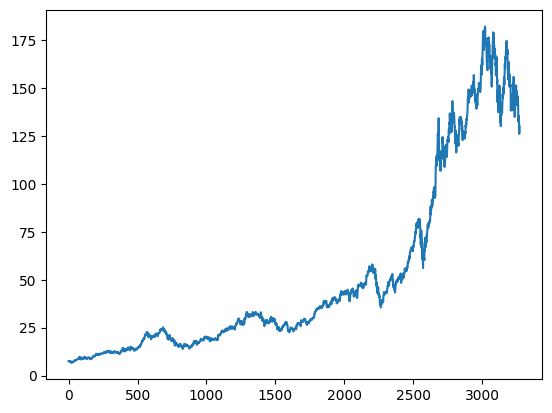

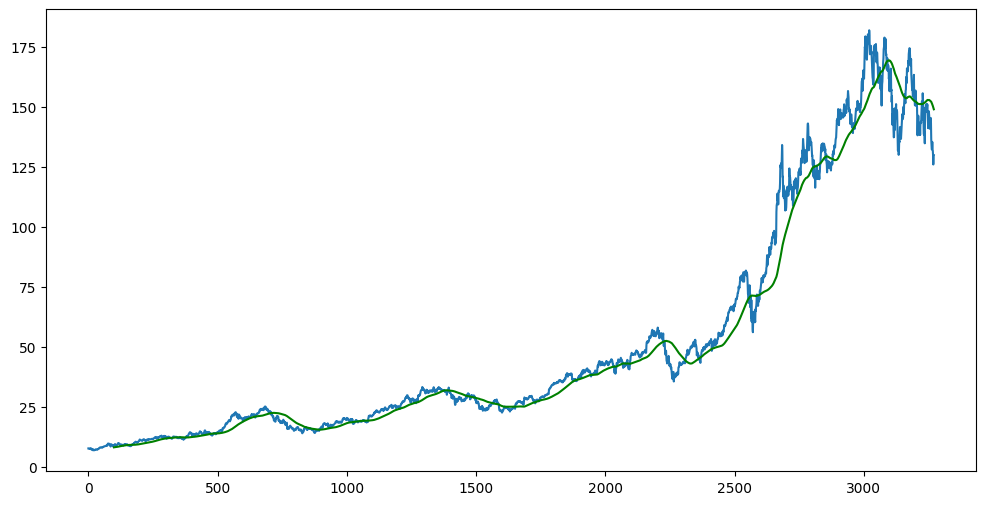

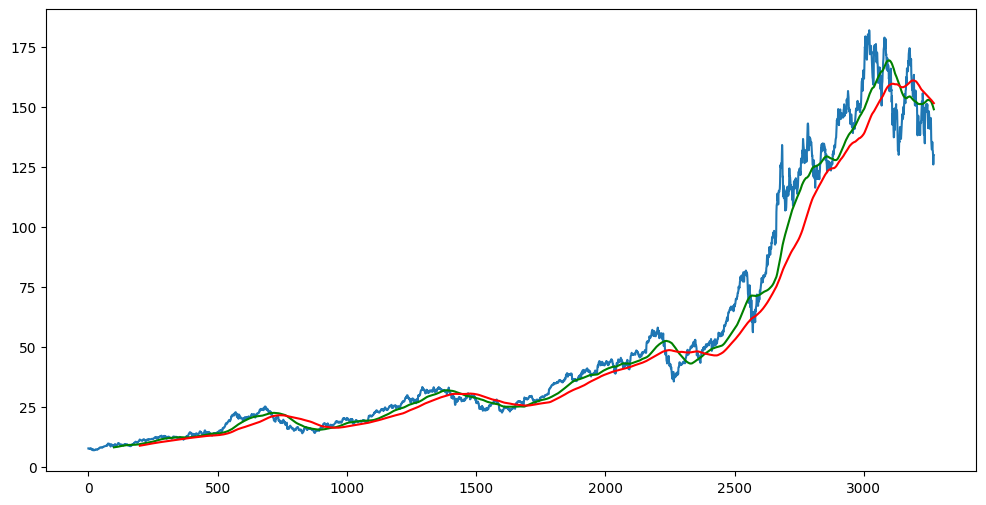

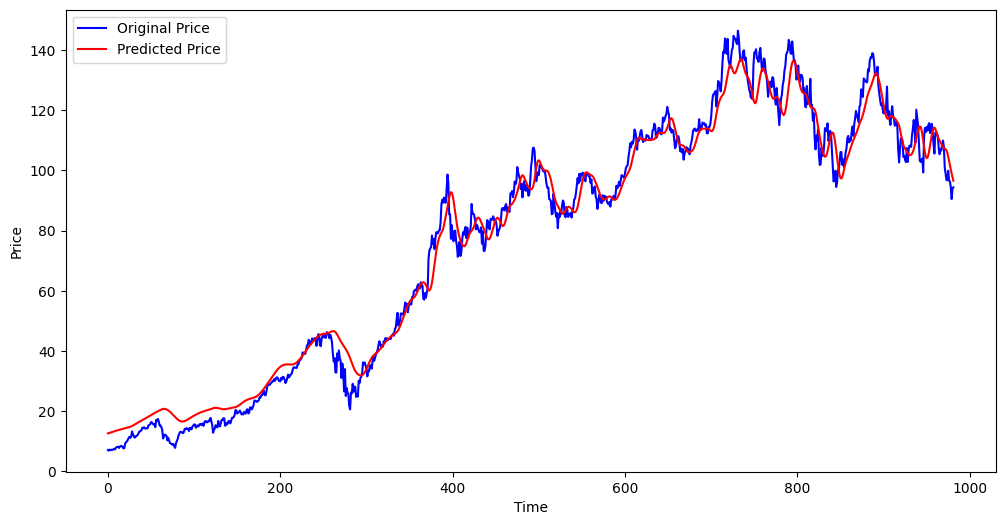

In [2]:
# prompt: merge all the above 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Define the stock symbol and the date range
symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download historical data
data = yf.download(symbol, start=start_date, end=end_date)

# Display the data
print(data)

data.head()
data.tail()
data = data.reset_index()
data.head()
data = data.drop(['Date','Adj Close'], axis = 1)
data.head()
plt.plot(data.Close)
ma100 = data.Close.rolling(100).mean()
ma100
ma100[100]
ma100[98]
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100,'g')
ma200 = data.Close.rolling(200).mean()
ma200
plt.figure(figsize = (12,6))
plt.plot(data.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')
data.shape
#Splitting Data into Training and Testing

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.7)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.7):int(len(data))])


data_training.head()
data_testing.head()
scaler = MinMaxScaler(feature_range = (0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array
data_training_array.shape
data_training_array.shape[0]
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
#ML Model
# Define the model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)  # Increase the number of epochs for better convergence
model.save('my_model.h5')

model.save('my_model.h5')
data_testing.head()
past_100_days = data_training.tail(100)
print(type(past_100_days))
final_data = pd.concat([past_100_days, data_testing], ignore_index=True)

final_data.head()
input_data = scaler.fit_transform(final_data)
input_data
input_data.shape
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)
#Making Prediction

y_predicted = model.predict(x_test)
y_predicted.shape
y_predicted
scaler.scale_
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test *scale_factor
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
